In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_stata('GSS2018.dta', 
                   convert_categoricals= False)
df.head(3)

,abany,abdefect,abfelegl,abhelp1,abhelp2,abhelp3,abhelp4,abhlth,abinspay,abmedgov1,...,xmarsex,xmarsex1,xmovie,xnorcsiz,year,yearsjob,yearsusa,yearval,yousup,zodiac
0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,NaN,6,2018,1.0,NaN,NaN,45.0,6.0
1,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,...,1.0,NaN,2.0,6,2018,NaN,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,2.0,1.0,...,NaN,1.0,2.0,6,2018,15.0,NaN,NaN,3.0,1.0


# Left vs Right

In [3]:
def gen_p(x):
    if x == 1: return "Clinton"
    if x == 2: return "Trump"
    return "Other"

def gen_v(x):
    if x <= 3: return "liberal"
    if x >= 5: return "conservative"
    if x == 4: return "moderate"
    return "other"

df['president'] = df['pres16'].apply(gen_p)
df['pviews'] = df['polviews'].apply(gen_v)

print(Counter(df['president']))
print(Counter(df['pviews']))

df['polviews'].describe()

Counter({'Other': 1007, 'Clinton': 764, 'Trump': 577})
Counter({'moderate': 855, 'conservative': 736, 'liberal': 656, 'other': 101})


count    2247.000000
mean        4.048954
std         1.499572
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: polviews, dtype: float64

### Voting Behavior
* POLVIEWS: 1=extremely liberal, 7=extremely conservative  

While it is clear that liberals tend to vote for Clinton and conservatives tend to vote for Trump, there do exist extremely liberals who voted for Trump and extremely conservatives who voted for Clinton.  

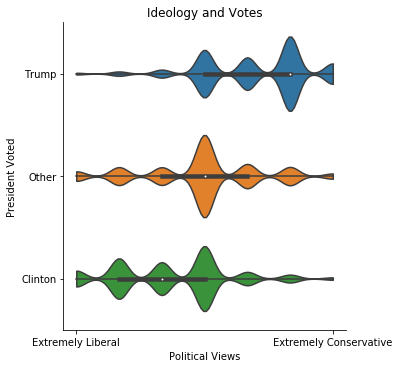

In [4]:
sns.catplot(x="polviews", y="president",
            kind="violin", bw=.15, cut=0,
            data=df)
plt.xticks([1, 7], ['Extremely Liberal', 'Extremely Conservative'])
plt.xlabel('Political Views')
plt.ylabel('President Voted')
plt.title('Ideology and Votes')
plt.show()

President preference matters more than ideology preference to people's confidence on the Federal Government and Press.

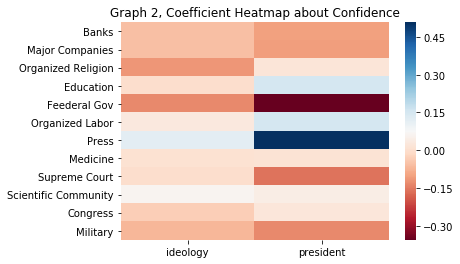

In [5]:
lst = ['confinan','conbus', 'conclerg', 'coneduc', 'confed', 
       'conlabor', 'conpress', 'conmedic', 'conjudge', 
       'consci', 'conlegis', 'conarmy']
fil_data = df[(df['pviews'] != 'other') & (df['president'] != 'Other')]

a = np.array([[0,0]])
for topic in lst:
    fil_data = fil_data.dropna(subset = [topic])
    x = np.array(list(zip(fil_data['polviews'], fil_data['pres16'])))
    y = np.array(fil_data[topic])
    model = LinearRegression().fit(x, y)
    a = np.append(a, [model.coef_], axis = 0)
a = a[1:]
m = pd.DataFrame(a)
    
lst = ['Banks','Major Companies', 'Organized Religion', 
       'Education', 'Feederal Gov', 
       'Organized Labor', 'Press', 'Medicine', 'Supreme Court', 
       'Scientific Community', 'Congress', 'Military']

m = m.rename(index=dict(zip(range(len(lst)), lst)))
m = m.rename(columns={0: 'ideology', 1: 'president'})
sns.heatmap(m, cmap="RdBu")
plt.title('Graph 2, Coefficient Heatmap about Confidence')
plt.show()

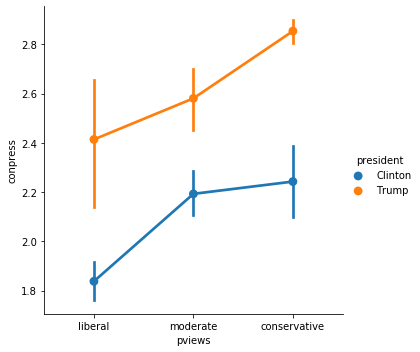

In [6]:
# Press
fil_data = df[(df['pviews'] != 'other') & (df['president'] != 'Other')]
sns.catplot(x="pviews", y="conpress", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

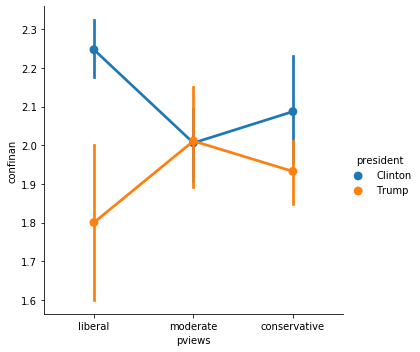

In [7]:
# Banks and financial institutions
sns.catplot(x="pviews", y="confinan", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

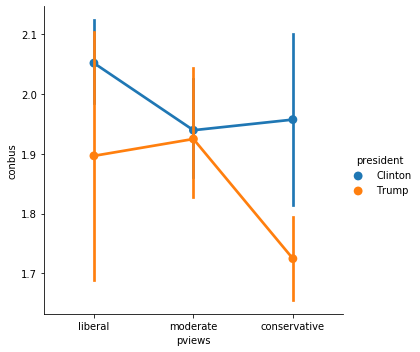

In [8]:
# Major companies
sns.catplot(x="pviews", y="conbus", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

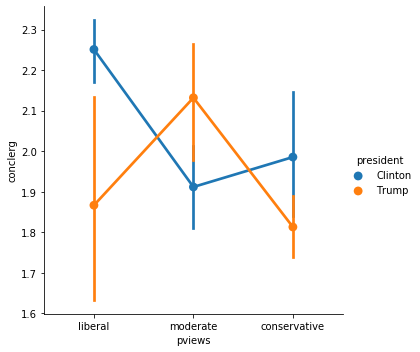

In [9]:
# organized religion
sns.catplot(x="pviews", y="conclerg", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

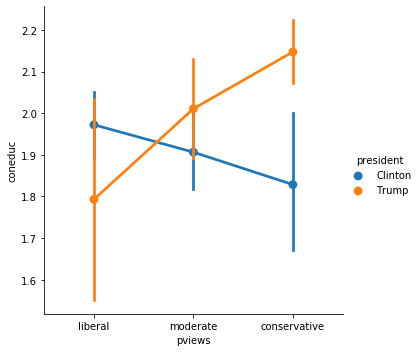

In [10]:
# Education
sns.catplot(x="pviews", y="coneduc", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

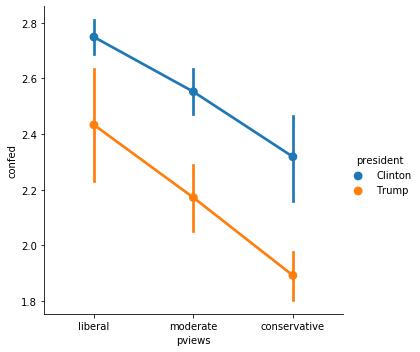

In [11]:
#Executive branch of the federal government
sns.catplot(x="pviews", y="confed", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

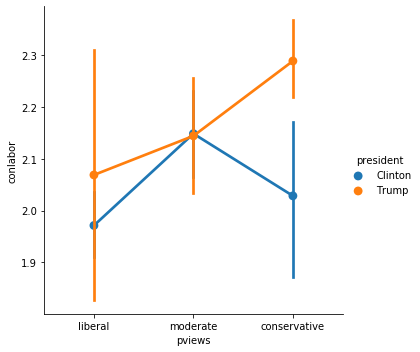

In [12]:
# Organized labor
sns.catplot(x="pviews", y="conlabor", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

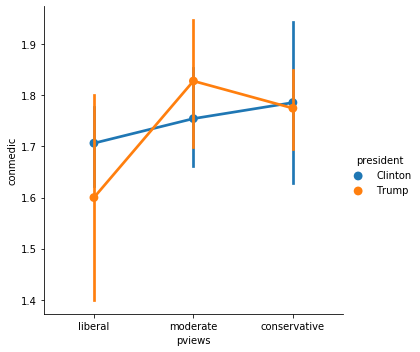

In [13]:
# Medicine
sns.catplot(x="pviews", y="conmedic", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

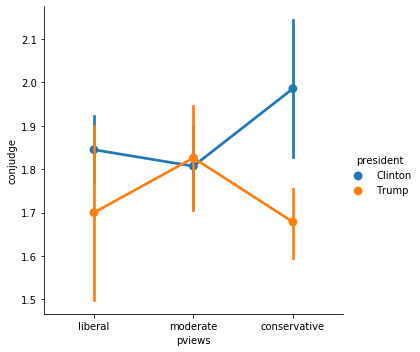

In [14]:
# Supreme Court
sns.catplot(x="pviews", y="conjudge", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

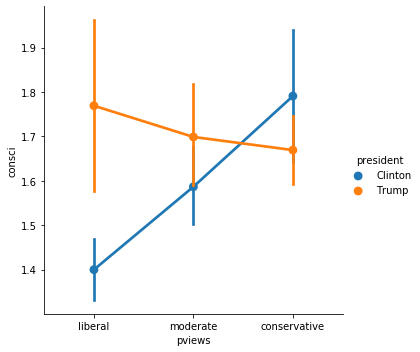

In [15]:
# Scientific Community
sns.catplot(x="pviews", y="consci", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

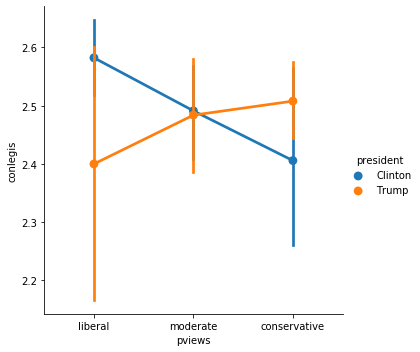

In [16]:
# Congress
sns.catplot(x="pviews", y="conlegis", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

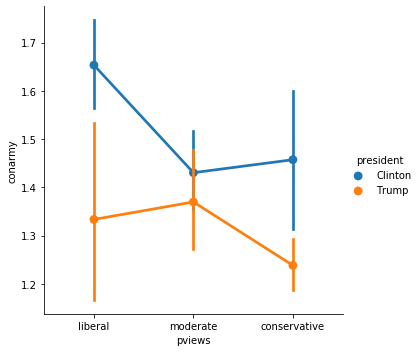

In [17]:
# military
sns.catplot(x="pviews", y="conarmy", hue="president", 
            kind="point", data = fil_data, 
            order = ['liberal', 'moderate', 'conservative'],
            hue_order = ['Clinton', 'Trump'])
plt.show()

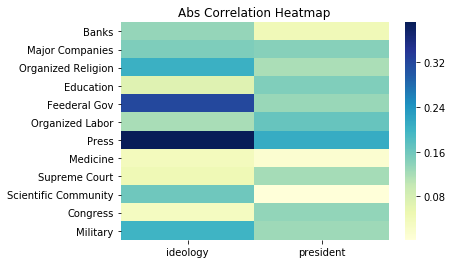

In [18]:
fil_data = df[(df['pres16'] < 3) &(df['polviews']<8)]

lst = ['confinan','conbus', 'conclerg', 'coneduc', 'confed', 
       'conlabor', 'conpress', 'conmedic', 'conjudge', 
       'consci', 'conlegis', 'conarmy']

cor = np.zeros([2, len(lst)])
x1 = fil_data['polviews']
x2 = fil_data['pres16']

fil_data = fil_data[[*lst]]
for i in range(len(lst)):
    cor[0][i] = x1.corr(fil_data[fil_data.columns[i]])
    
for i in range(len(lst)):
    cor[1][i] = x2.corr(fil_data[fil_data.columns[i]])

lst = ['Banks','Major Companies', 'Organized Religion', 
       'Education', 'Feederal Gov', 
       'Organized Labor', 'Press', 'Medicine', 'Supreme Court', 
       'Scientific Community', 'Congress', 'Military']

m = pd.DataFrame(cor)
m = m.rename(columns=dict(zip(range(len(lst)), lst)))
m = m.rename(index={0: 'ideology', 1: 'president'})
sns.heatmap(abs(m.T), cmap="YlGnBu")
plt.title('Abs Correlation Heatmap')
plt.show()

### Right vs Left Policy Tendency
* The following heatmaps show how liberals, moderates, and conservatives think about particular policies. Please note that the values for each heatmaps are calculated as, for example `(number of people who think it is "too much" and is conservative) / (number of conservatives)`. Therefore, only vertical comparisons are meaningful.

* Because there are two forms (Form X and Form Y), here I combine the responses of both forms together.

* Question: We are faced with many problems in this country, none of which can be solved easily or inexpensively. I'm going to name some of these problems, and for each one I'd like you to tell me whether you think we're spending too much money on it, too little money, or about the right amount. First . . . are we spending too much, too little, or about the right amount on . . .?

In [19]:
def gen_v(x):
    if x == 1: return "Too Little"
    if x == 2: return "Just Right"
    if x == 3: return "Too Much"
    return "Other"

# coly=None because some questions only appear in form X
def plot_heatmap(col, coly = None, n_col = 'new'):
    df[n_col] = df[col].apply(gen_v)
    
    filtered_data = df.dropna(subset=[col])
    
    if coly: 
        b = df.dropna(subset=[coly])
        ## make sure the two forms are seperated
        assert(len(set(filtered_data['id']) & set(b['id'])) == 0)
        filtered_data = filtered_data.append(b)
    
    mat = pd.crosstab(filtered_data[n_col], filtered_data.pviews)
    for i in mat:
        mat[i] = mat[i]/ mat[i].sum()
        
    lst = ['Too Much', 'Just Right', 'Too Little']
    mat = mat[['liberal','moderate','conservative']]
    mat = mat.reindex(lst)
    
    temp = {x: round(mat['conservative'][x], 2) for x in lst if 
            mat['conservative'][x] > 0.3}
    cons_dic[col] = temp
    
    temp = {x: round(mat['liberal'][x], 2) for x in lst if 
            mat['liberal'][x] > 0.3}
    libr_dic[col] = temp
    
    sns.heatmap(mat, cmap="YlGnBu", square = True)
    plt.show()

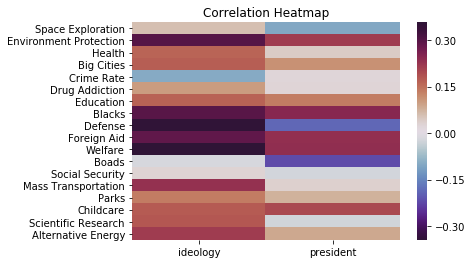

In [20]:
fil_data = df[(df['pres16'] < 3) &(df['polviews']<8)]

lst = ['natspac','natenvir', 'natheal', 'natcity', 'natcrime', 
       'natdrug', 'nateduc', 'natrace', 'natarms', 
       'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 
       'natpark', 'natchld', 'natsci', 'natenrgy']

cor = np.zeros([2, len(lst)])
x1 = fil_data['polviews']
x2 = fil_data['pres16']

fil_data = fil_data[[*lst]]
for i in range(len(lst)):
    cor[0][i] = x1.corr(fil_data[fil_data.columns[i]])
    
for i in range(len(lst)):
    cor[1][i] = x2.corr(fil_data[fil_data.columns[i]])
    
lst = ['Space Exploration','Environment Protection', 
       'Health', 'Big Cities', 'Crime Rate', 
       'Drug Addiction', 'Education', 'Blacks', 'Defense', 
       'Foreign Aid', 'Welfare', 'Boads', 'Social Security', 
       'Mass Transportation', 'Parks', 'Childcare', 
       'Scientific Research', 'Alternative Energy']
    
m = pd.DataFrame(cor)
m = m.rename(columns=dict(zip(range(len(lst)), lst)))
m = m.rename(index={0: 'ideology', 1: 'president'})
sns.heatmap(m.T, cmap="twilight_shifted")
plt.title('Correlation Heatmap')
plt.show()

Those we excluded from the sample have slightly more liberal tendency.

In [21]:
fil_data = df.dropna(subset=['vote16']).copy()
fil_data['missed'] = fil_data['pres16'].apply(lambda x: x not in [1,2])
print(Counter(fil_data[fil_data['missed']]['vote16']))
print(Counter(fil_data[fil_data['missed']==False]['vote16']))
fil_data.groupby(['missed','vote16'])['polviews'].describe()

Counter({2.0: 658, 1.0: 182, 3.0: 132})
Counter({1.0: 1341})


count      mean       std  min  25%  50%   75%  max
missed vote16                                                      
False  1.0     1308.0  4.107034  1.595953  1.0  3.0  4.0  5.25  7.0
True   1.0      176.0  3.943182  1.359479  1.0  4.0  4.0  5.00  7.0
       2.0      610.0  3.981967  1.326007  1.0  3.0  4.0  5.00  7.0
       3.0      124.0  3.798387  1.453786  1.0  3.0  4.0  4.00  7.0

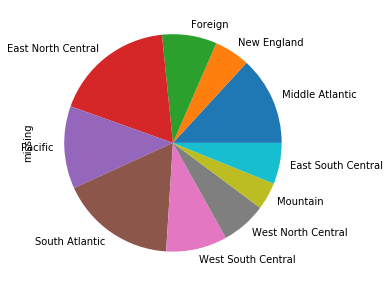

In [22]:
reg_dic ={0: 'Foreign',
          1: "New England",
          2: "Middle Atlantic",
          3: "East North Central",
          4: "West North Central",
          5: "South Atlantic",
          6: "East South Central",
          7: "West South Central",
          8: "Mountain",
          9: "Pacific"}

fil_data['Region'] = fil_data['region'].apply(lambda k: reg_dic[k])
fil_data['Region_from'] = fil_data['reg16'].apply(lambda k: reg_dic[k])

dic = Counter(fil_data[fil_data['missed']==True & (fil_data['vote16']==3)]['Region_from'])
pie_df = pd.DataFrame(dic, index=['missing'])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.show()

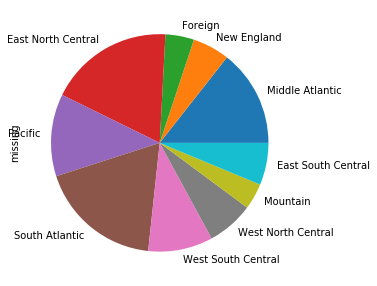

In [23]:
dic = Counter(fil_data[fil_data['missed']==False]['Region_from'])
pie_df = pd.DataFrame(dic, index=['missing'])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.show()

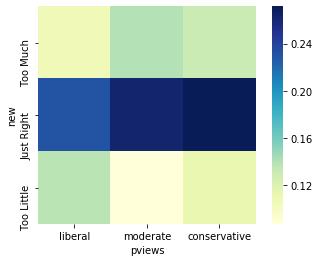

In [24]:
cons_dic = dict()
libr_dic = dict()
# Space exploration program
plot_heatmap('natspac', 'natspacy')

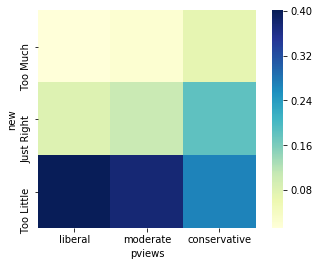

In [25]:
# Improving and protecting the environment
plot_heatmap('natenvir', 'natenviy')

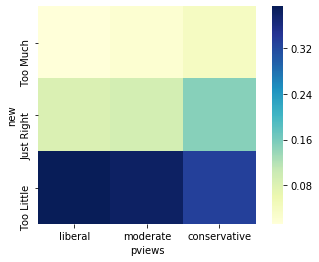

In [26]:
# Improving and protecting the nation's health
plot_heatmap('natheal', 'nathealy')

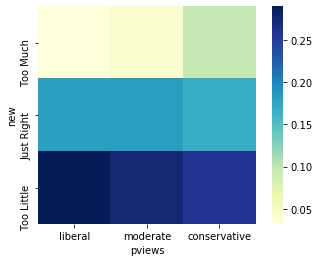

In [27]:
# Solving the problems of the big cities
plot_heatmap('natcity', 'natcityy')

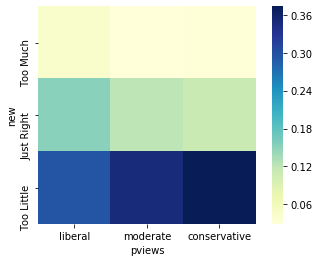

In [28]:
# Halting the rising crime rate
plot_heatmap('natcrime', 'natcrimy')

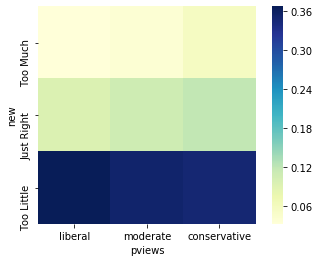

In [29]:
# Dealing with drug addiction
plot_heatmap('natdrug', 'natdrugy')

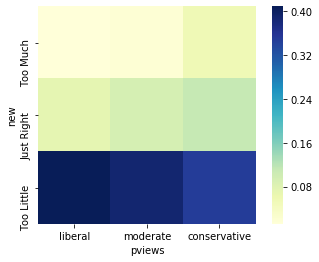

In [30]:
# Improving the nation's education system
plot_heatmap('nateduc', 'nateducy')

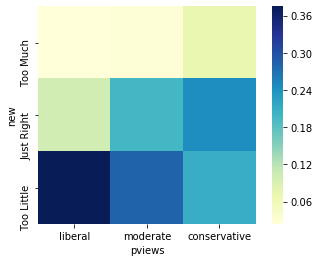

In [31]:
# Improving the conditions of Blacks
plot_heatmap('natrace', 'natracey')

The topic about "military, armaments and defense" is one of the most ideological ones. Liberals, moderates, and conservatives have completely different views over how much military spending is acceptable.

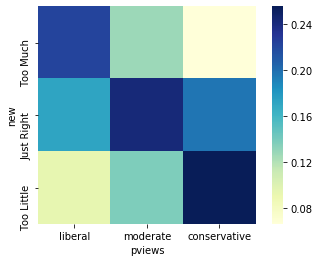

In [32]:
# The military, armaments and defense
plot_heatmap('natarms', 'natarmsy')

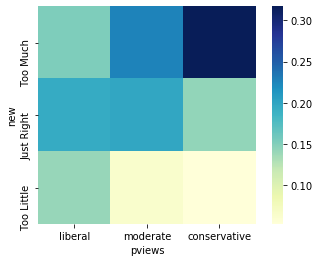

In [33]:
# Foreign aid
plot_heatmap('nataid', 'nataidy')

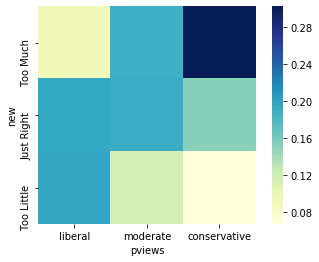

In [34]:
# Welfare
plot_heatmap('natfare','natfarey')

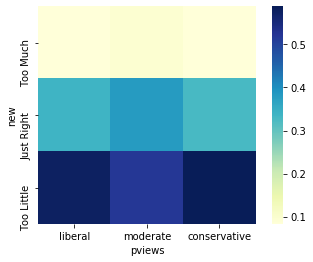

In [35]:
# Highways and bridges
plot_heatmap('natroad')

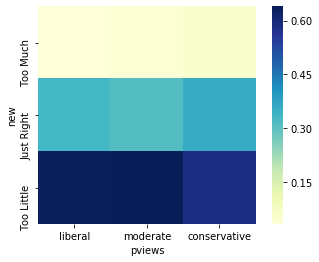

In [36]:
# Social Security
plot_heatmap('natsoc')

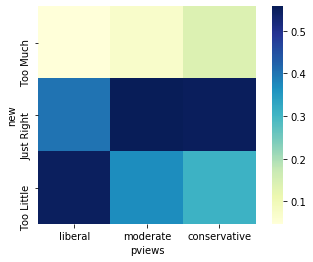

In [37]:
# Mass Transportation
plot_heatmap('natmass')

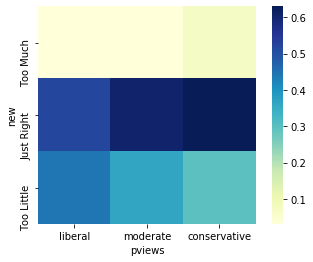

In [38]:
# Parks and recreation
plot_heatmap('natpark')

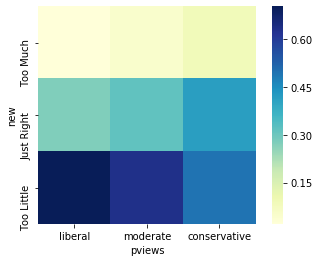

In [39]:
# Assistance for childcare
plot_heatmap('natchld')

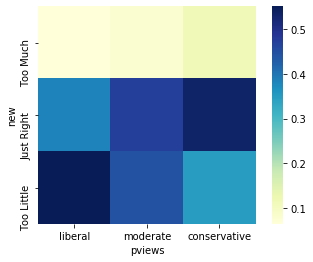

In [40]:
# Supporting scientific research
plot_heatmap('natsci')

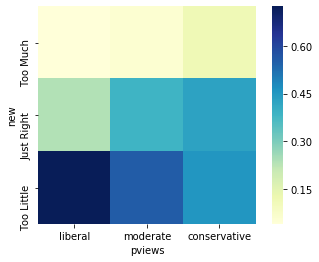

In [41]:
# Developing alternative energy sources
plot_heatmap('natenrgy')

## Interesting findings
* As expected, there are a few topics that only conservatives or liberals focus on (no matter whether they think they are too much or too little). Only conservatives focus on crime, foriegn aid, and road construction, and only liberals focus on environment and minority issues. 
* Most of both conservatives and liberals think that the government is spending too little in "improving and protecting the nation's health." This quite surprising given the huge battle between the two groups on healthcare reform. However, this question is so awkwardly phrased that 1) it is not clear whether the word "health" actually refers to. 2) it is not clear what the policy implications should be. 
* There are many other topics about which conservatives and liberals share surprisingly similar attitudes: they both think that the government spent too little in dealing with drug addiction, improving the education system, constructing roads, supporting scientific research, and developing alternative energy sources, as well as providing social security, mass transportation, and assistance for childcare. This shows that people from both ideological ends share some common sense regarding what the situation of the society is: they just differ in their opinions on what the priorities are and what the solutions should be. 

In [42]:
for i in cons_dic:
    if len(cons_dic[i]) != 0:
        print(i, cons_dic[i])

natheal {'Too Little': 0.33}
natcrime {'Too Little': 0.37}
natdrug {'Too Little': 0.35}
nateduc {'Too Little': 0.35}
nataid {'Too Much': 0.32}
natfare {'Too Much': 0.3}
natroad {'Just Right': 0.33, 'Too Little': 0.59}
natsoc {'Just Right': 0.36, 'Too Little': 0.59}
natmass {'Just Right': 0.55, 'Too Little': 0.31}
natpark {'Just Right': 0.63}
natchld {'Just Right': 0.42, 'Too Little': 0.5}
natsci {'Just Right': 0.54, 'Too Little': 0.35}
natenrgy {'Just Right': 0.43, 'Too Little': 0.46}


In [43]:
for i in libr_dic:
    if len(libr_dic[i]) != 0:
        print(i, libr_dic[i])

natenvir {'Too Little': 0.4}
natheal {'Too Little': 0.39}
natdrug {'Too Little': 0.37}
nateduc {'Too Little': 0.41}
natrace {'Too Little': 0.37}
natroad {'Just Right': 0.34, 'Too Little': 0.58}
natsoc {'Just Right': 0.33, 'Too Little': 0.63}
natmass {'Just Right': 0.4, 'Too Little': 0.55}
natpark {'Just Right': 0.52, 'Too Little': 0.45}
natchld {'Too Little': 0.7}
natsci {'Just Right': 0.38, 'Too Little': 0.55}
natenrgy {'Too Little': 0.72}


# Race and Income
The question asks "Irish, Italians, Jewish and many other minorities overcame prejudice and worked their way up. Blacks should do the same without special favors." Most white people agree strongly/ agree somewhat. Supprisingly, there are also some black people who agree somewhat on this argument. Also, other minorities share their opinion with the white people. It implies that we cannot easily assume that people of colors other than black, as minorities, tend to naturally be willing to support the political movement for black people's rights. 

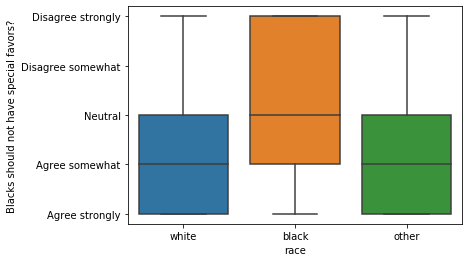

In [44]:
fil_data = df.dropna(subset=['wrkwayup'])
sns.boxplot(x = 'race', y='wrkwayup', data = fil_data)
plt.xticks([0, 1, 2], ['white', 'black', 'other'])
plt.ylabel('Blacks should not have special favors?')
plt.yticks([1,2,3,4,5], ['Agree strongly', 
                         'Agree somewhat', 'Neutral', 
                         'Disagree somewhat', 'Disagree strongly'])
plt.show()

### Income
The question hasn't been changed for over fourty years: now most of the people have \$25,000 or over annual income and it does not mean quite much any more.

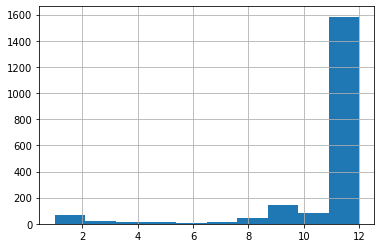

In [45]:
df['income'].hist()
plt.show()

Female African Americans earn significantly less than other racial-sex groups. 

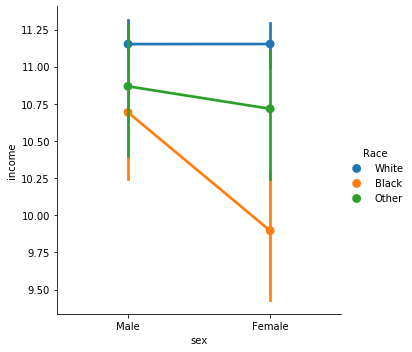

In [46]:
def gen_r(x):
    if x == 1: return "White"
    if x == 2: return "Black"
    return "Other"
df['Race'] = df['race'].apply(gen_r)
sns.catplot(x="sex", y="income", hue="Race", 
            kind="point", data = df)
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

Unlike other religious groups, Jewish female earns quite much more than Jewish male. This is probably because of the higher variance: there are only 39 Jewish people in the sample.

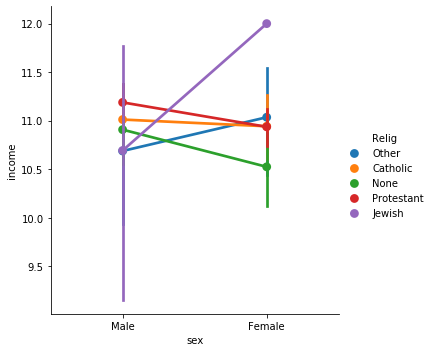

In [47]:
def gen_r(x):
    if x == 1: return "Protestant"
    if x == 2: return "Catholic"
    if x == 3: return "Jewish"
    if x == 4: return "None"
    return "Other"

df['Relig'] = df['relig'].apply(gen_r)
sns.catplot(x="sex", y="income", hue="Relig", 
            kind="point", data = df)
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

In [48]:
Counter(df['Relig'])

Counter({'Other': 135,
         'Catholic': 493,
         'None': 542,
         'Protestant': 1139,
         'Jewish': 39})

The income difference between male and female is most significant among conservative groups. Also, conservatives tend to earn more than liberals.

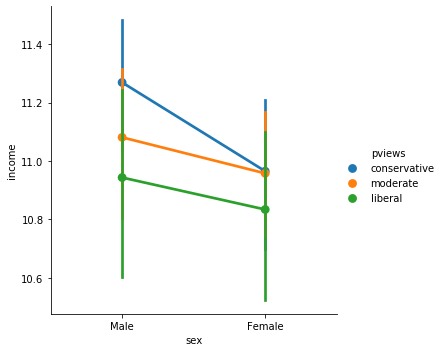

In [49]:
fil_data = df[df["pviews"] != 'other']
sns.catplot(x="sex", y="income", hue="pviews", 
            kind="point", data = fil_data)
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

Among those who oppose the legalization of marijuana, female has much lower income than male. It might be that the conservatives are both more sexist in terms of income distribution and more tend to oppose marijuana. 

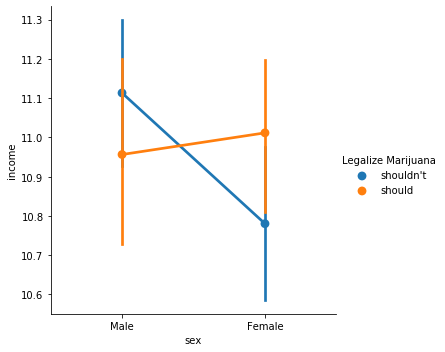

In [50]:
df['Legalize Marijuana'] = df['grass'].apply(lambda x: 
                                             "should" if x == 1 else "shouldn't")
sns.catplot(x="sex", y="income", hue="Legalize Marijuana", 
            kind="point", data = df)
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

The African Americans who think marijuana shouldn't be legalized earn much less than those who think it should be legalized. Is this because poorer African Americans have worse memory related to marijuana?

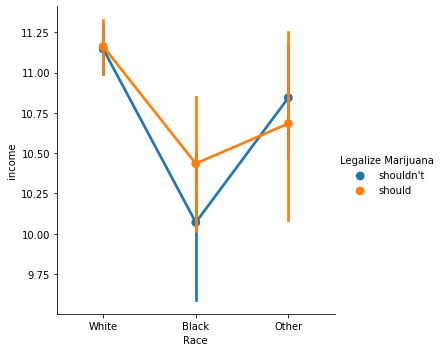

In [51]:
sns.catplot(x="Race", y="income", hue="Legalize Marijuana", 
            kind="point", data = df)
plt.show()

# Some other explorations
### Gun law
The question asks: Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun? But even extreme liberals may "oppose" this law. This might imply that the question is not well-phrased. Those who oppose the law may either think that 1) a person can buy guns without a police permit or 2) a person should not be allowed to buy guns in any situation. Also, there are more conservatives who support this law than oppose it. This may suggest that different respondents imagine different alternative laws.

Counter({'Favor': 1102, 'Oppose': 439})


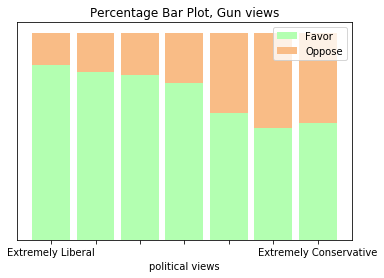

In [52]:
df['favor_gunlaw'] = df['gunlaw'].apply(lambda x: 'Favor' if x == 1 
                    else 'Oppose')
fil_data = df.dropna(subset=['gunlaw'])
print(Counter(fil_data['favor_gunlaw']))
df_g = pd.crosstab(fil_data['polviews'], fil_data['favor_gunlaw'])

r = list(map(float, range(1,8)))
totals = [i+j for i,j in zip(df_g['Favor'], df_g['Oppose'])]
FavorBars = [i / j * 100 for i,j in zip(df_g['Favor'], totals)]
OpposeBars = [i / j * 100 for i,j in zip(df_g['Oppose'], totals)]
barWidth = 0.85
names = ('Extremely Liberal','','','','','','Extremely Conservative')

plt.bar(r, FavorBars, color='#b3ffb1', width=barWidth, label='Favor')
plt.bar(r, OpposeBars, bottom=FavorBars, color='#f9bc86', 
        width=barWidth, label = 'Oppose')

plt.xticks(r, names)
plt.xlabel("political views")
plt.yticks([])
plt.title('Percentage Bar Plot, Gun views')
plt.legend()
plt.show()

## Religion
### Post life
As expected, those who strongly or relatively strongly religious tend to believe more that there is a life after death. The interesting part is that, even among the most committed religious groups there are people who don't believe that there is a life after death, and even among those who have no religious beliefs, there are people who believe that there does exist a life after death. Religion seems neither a necessary or a sufficient condition for the belief in postlife.

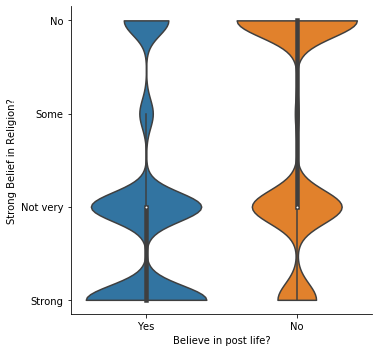

In [53]:
fil_data = df.dropna(subset=['reliten', 'postlife'])
sns.catplot(x="postlife", y="reliten",
            kind="violin", bw=.15, cut=0,
            data=fil_data)
plt.yticks([1,2,3,4], 
           ['Strong', 'Not very', 'Some', 'No'])
plt.xticks([0,1], ['Yes', 'No'])
plt.ylabel("Strong Belief in Religion?")
plt.xlabel("Believe in post life?")
plt.show()

### Family and Religion
* Protestants constitute almost half of the sample.
* Family plays a big role in determining one's religious preference. Most of the changes tend to be either born in a religious family and become non-religious, or convert to Protestant from other groups. 

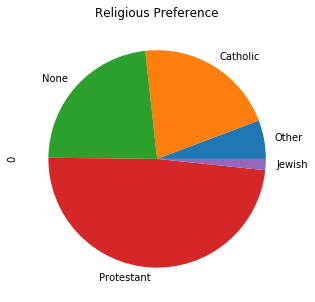

In [54]:
pie_df = pd.DataFrame([Counter(df['Relig'])])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.title("Religious Preference")
plt.show()

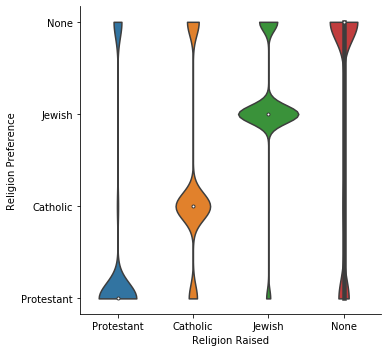

In [55]:
fil_data = df.dropna(subset=['relig', 'relig16'])
lst = ['Protestant', 'Catholic', 'Jewish', 'None', 'Other']
fil_data = fil_data[fil_data['relig'] <= 4]
fil_data = fil_data[fil_data['relig16'] <= 4]

sns.catplot(x="relig16", y="relig",
            kind="violin", bw=.15, cut=0,
            data=fil_data)
plt.yticks([1,2,3,4], lst)
plt.xticks([0,1,2,3], lst)
plt.xlabel("Religion Raised")
plt.ylabel("Religion Preference")
plt.show()

In [56]:
np.corrcoef(fil_data['relig16'], fil_data['relig'])
## correlation = 0.44

array([[1.        , 0.43953824],
       [0.43953824, 1.        ]])

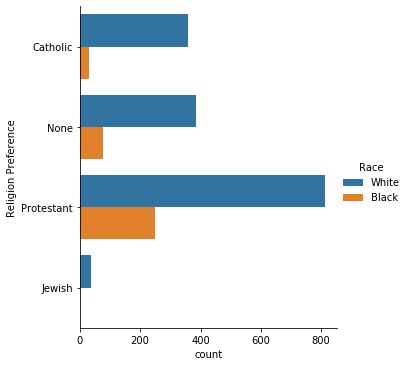

In [57]:
fil_data = fil_data[fil_data['Race'] != 'Other']
sns.catplot(y="Relig", hue="Race", 
            kind="count", 
            data= fil_data)
plt.ylabel("Religion Preference")
plt.show()

There are non-religious people who attend religious services: Is this an error? or do they just attend religious services with their religious friends/ family members? Also, Catholic and Protestant groups seem a bit more active than the Jewish group.

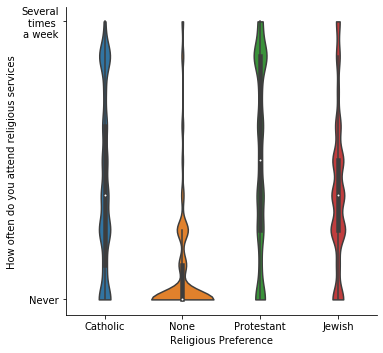

In [58]:
fil_data = fil_data[fil_data['attend'] < 9]
sns.catplot(x="Relig", y="attend",
            kind="violin", bw=.15, cut=0,
            data=fil_data)
plt.ylabel("How often do you attend religious services")
plt.xlabel('Religious Preference')
plt.yticks([0, 8], ['Never', "Several\ntimes \na week"])
plt.show()

### Region 

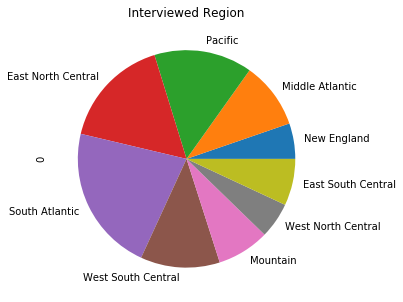

In [59]:
reg_dic ={0: 'Foreign',
          1: "New England",
          2: "Middle Atlantic",
          3: "East North Central",
          4: "West North Central",
          5: "South Atlantic",
          6: "East South Central",
          7: "West South Central",
          8: "Mountain",
          9: "Pacific"}

df['Region'] = df['region'].apply(lambda k: reg_dic[k])
df['Region_from'] = df['reg16'].apply(lambda k: reg_dic[k])
pie_df = pd.DataFrame([Counter(df['Region'])])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.title("Interviewed Region")
plt.show()

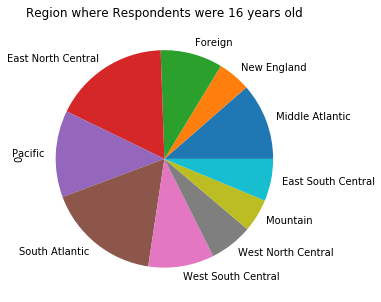

In [60]:
pie_df = pd.DataFrame([Counter(df['Region_from'])])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.title("Region where Respondents were 16 years old")
plt.show()

## Marriage

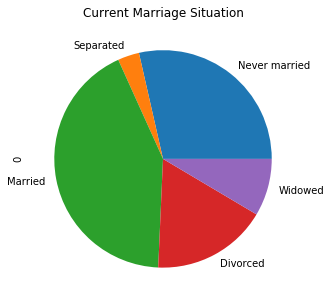

In [61]:
mar_dic ={1: "Married",
          2: "Widowed",
          3: "Divorced",
          4: "Separated",
          5: "Never married"}

fil_data = df.dropna(subset = ['marital']).copy()
fil_data['Marriage'] = fil_data['marital'].apply(lambda k: mar_dic[k])
pie_df = pd.DataFrame([Counter(fil_data['Marriage'])])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.title("Current Marriage Situation")
plt.show()

The difference in family roles between male and female is still significant. 

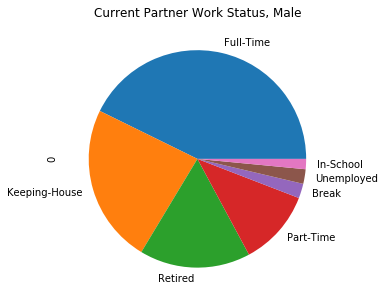

In [62]:
mar_dic ={1: "Full-Time",
          2: "Part-Time",
          3: "Break",
          4: "Unemployed",
          5: "Retired",
          6: "In-School",
          7: "Keeping-House"}
fil_data = df.dropna(subset = ['spwrksta']).copy()
fil_data = fil_data[fil_data['spwrksta'] < 8]
fil_data['Partner Status'] = fil_data['spwrksta'].apply(lambda k: mar_dic[k])
fil_data = fil_data[fil_data['sex'] == 1]
pie_df = pd.DataFrame([Counter(fil_data['Partner Status'])])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.title("Current Partner Work Status, Male")
plt.show()

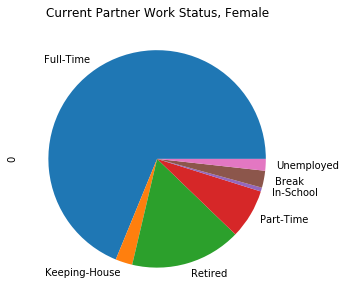

In [63]:
fil_data = df.dropna(subset = ['spwrksta']).copy()
fil_data = fil_data[fil_data['spwrksta'] < 8]
fil_data['Partner Status'] = fil_data['spwrksta'].apply(lambda k: mar_dic[k])
fil_data = fil_data[fil_data['sex'] == 2]
pie_df = pd.DataFrame([Counter(fil_data['Partner Status'])])
pie_df = pie_df.T
pie_df.plot(kind='pie', subplots=True, figsize=(5, 5), legend=None)
plt.title("Current Partner Work Status, Female")
plt.show()